In [1]:
#Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

In [3]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
dfx.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [5]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [7]:
dfy.shape

(576, 1)

In [8]:
dfx.shape

(576, 8)

In [14]:
X = dfx.values
Y = dfy.values

#OR

# X = np.genfromtxt("Diabetes_XTrain.csv", delimiter=";", skip_header=1)
# Y = np.genfromtxt("Diabetes_YTrain.csv", delimiter=";", skip_header=1)

In [15]:
print(type(X) , type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [16]:
X.shape

(576, 8)

In [17]:
Y.shape

(576, 1)

In [19]:
Y = Y.reshape((-1,))
Y.shape

(576,)

In [23]:
a = np.unique(Y , return_counts = True)
a

(array([0, 1], dtype=int64), array([375, 201], dtype=int64))

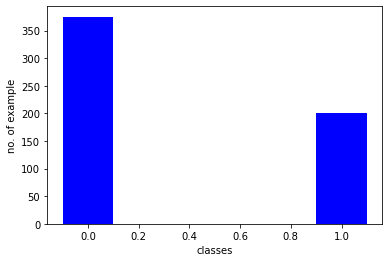

In [25]:
plt.bar(a[0],a[1],width = 0.2 , color = "blue")
plt.xlabel("classes")
plt.ylabel("no. of example")
plt.show()

In [28]:
##KNN ALGORITHM(standard, same as in the video)

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,queryPoint,k=5):
    
    vals = []     ## to store distances
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)    ## it has 2 thing 1) unique class 2) freq of unique class
    #print(new_vals)
    
    index = new_vals[1].argmax()    ## gives the position of maximum number
    pred = new_vals[0][index]
    
    return pred

In [29]:
x_test = pd.read_csv('Diabetes_Xtest.csv')

In [31]:
x_test = x_test.values

In [32]:
print(type(x_test))

<class 'numpy.ndarray'>


In [33]:
pred = []
m = x_test.shape[0]

In [37]:
for i in range(m):
    ans = knn(X , Y , x_test[i])
    pred.append(ans)

In [38]:
pred=np.array(pred)
pred.shape

(192,)

In [39]:
x_test.shape

(192, 8)

In [40]:
pred

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0.])

In [43]:
pred = pd.DataFrame(pred)

In [49]:
pred.rename(columns={"0":"Outcome"},inplace=True)

In [50]:
pred.to_csv("ans.csv" , index = False)

In [51]:
pred=pd.read_csv("ans.csv")

In [52]:
pred.shape

(192, 1)

In [53]:
pred.head()

,Outcome
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
